In [36]:
import pandas as pd
import numpy as np

In [37]:
data1 = pd.read_csv("/Users/siddhantaggarwal/Desktop/Battery_RUL/cleaned_dataset/data/00001.csv")

data1

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625
...,...,...,...,...,...,...
485,3.303251,-0.001760,9.662331,0.0004,0.000,6382.063
486,3.310303,-0.000756,9.390489,0.0002,0.000,6395.547
487,3.317351,-0.003318,9.137008,0.0002,0.000,6409.063
488,3.323387,-0.002291,8.972806,0.0002,0.000,6422.625


## First we will explore the metadata.csv file to understand the structure of the battery datasets.

In [38]:
metadata = pd.read_csv("/Users/siddhantaggarwal/Desktop/Battery_RUL/cleaned_dataset/metadata.csv")


print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB
None


In [39]:
metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [40]:
metadata.isna().sum()

type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64

In [23]:
metadata['Capacity']

0       1.6743047446975208
1                      NaN
2                      NaN
3                      NaN
4       1.5243662105099023
               ...        
7560                   NaN
7561    1.0201379996149256
7562                   NaN
7563    0.9907591663373165
7564                   NaN
Name: Capacity, Length: 7565, dtype: object

In [28]:
import re
from datetime import datetime

def parse_matlab_date_vector(date_str):
    if not isinstance(date_str, str):
        return pd.NaT
    
    cleaned_str = date_str.replace('[ ', '').replace(']', '').replace('...', '').strip()
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)
    
    if len(numbers) >= 6:
        try:
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT
    return pd.NaT

metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

In [29]:
metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,2010-07-21 16:53:45,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,2010-07-21 17:25:40,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,2010-07-21 20:31:05,24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [31]:
metadata.describe()

,start_time,ambient_temperature,test_id,uid
count,7565,7565.000000,7565.000000,7565.000000
mean,2009-08-14 03:15:30.815994624,20.017713,176.012558,3783.000000
min,2008-04-02 13:08:17,4.000000,0.000000,1.000000
25%,2008-07-11 18:25:27,4.000000,55.000000,1892.000000
50%,2009-08-02 09:10:15,24.000000,129.000000,3783.000000
75%,2010-06-30 09:21:28,24.000000,255.000000,5674.000000
max,2010-09-30 15:32:33,44.000000,615.000000,7565.000000
std,NaN,11.082914,152.174147,2183.971726


In [35]:

print("\n--- Data Types of 'Capacity', 'Re', 'Rct' ---")
print(metadata[['Capacity', 'Re', 'Rct']].dtypes)

print("\n--- Descriptive statistics for 'Capacity', 'Re', 'Rct' ---")
print(metadata[['Capacity', 'Re', 'Rct']].describe())

print("\n--- Unique values and counts for 'type' column ---")
print(metadata['type'].value_counts())

print("\n--- Unique values and counts for 'battery_id' column ---")
print(metadata['battery_id'].value_counts())

print("\n--- Verifying missing values based on 'type' ---")
# Capacity should be non-null primarily for 'discharge' cycles
print("\nMissing Capacity by type:")
print(metadata[metadata['Capacity'].isna()]['type'].value_counts())
print("\nNon-missing Capacity by type:")
print(metadata[metadata['Capacity'].notna()]['type'].value_counts())

# Re and Rct should be non-null primarily for 'impedance' cycles
print("\nMissing Re by type:")
print(metadata[metadata['Re'].isna()]['type'].value_counts())
print("\nNon-missing Re by type:")
print(metadata[metadata['Re'].notna()]['type'].value_counts())



--- Data Types of 'Capacity', 'Re', 'Rct' ---
Capacity    object
Re          object
Rct         object
dtype: object

--- Descriptive statistics for 'Capacity', 'Re', 'Rct' ---
       Capacity                   Re                  Rct
count      2794                 1956                 1956
unique     2752                 1956                 1956
top          []  0.05605783343888099  0.20097016584458333
freq         25                    1                    1

--- Unique values and counts for 'type' column ---
type
charge       2815
discharge    2794
impedance    1956
Name: count, dtype: int64

--- Unique values and counts for 'battery_id' column ---
battery_id
B0007    616
B0005    616
B0006    616
B0033    486
B0036    486
B0034    486
B0018    319
B0044    275
B0043    275
B0042    275
B0054    253
B0056    252
B0055    252
B0047    184
B0048    184
B0045    184
B0046    184
B0041    163
B0053    137
B0040    122
B0039    122
B0038    122
B0030     97
B0029     97
B0031     97
B

In [41]:
import pandas as pd

# Assuming metadata_df is already loaded from the previous step
# If not, uncomment the line below:
# metadata_df = pd.read_csv('cleaned_dataset/metadata.csv')

print("--- Before Cleaning and Conversion ---")
print(metadata.info())
print("\n--- Attempting to convert 'Capacity', 'Re', 'Rct' to numeric ---")

# Convert 'Capacity', 'Re', 'Rct' to numeric, coercing errors to NaN
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("\n--- After Cleaning and Conversion ---")
print(metadata.info())

print("\n--- Descriptive statistics for numerical columns after cleaning ---")
print(metadata.describe())

print("\n--- Checking for missing values after cleaning ---")
print(metadata.isna().sum())


--- Before Cleaning and Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB
None

--- Attempting to convert 'Capacity', 'Re', 'Rct' to numeric ---

--- After Cleaning and Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns

In [42]:
metadata[['Capacity', 'Re', 'Rct']].describe()

,Capacity,Re,Rct
count,2769.000000,1.947000e+03,1.947000e+03
mean,1.326543,-4.976500e+11,1.055903e+12
std,0.472517,2.195872e+13,4.659154e+13
min,0.000000,-9.689245e+14,-2.091081e+02
25%,1.150286,5.782157e-02,8.155754e-02
50%,1.428065,7.255344e-02,1.014191e-01
75%,1.673645,9.229960e-02,1.565123e-01
max,2.640149,4.482291e+02,2.055843e+15


In [43]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   start_time           7565 non-null   object 
 2   ambient_temperature  7565 non-null   int64  
 3   battery_id           7565 non-null   object 
 4   test_id              7565 non-null   int64  
 5   uid                  7565 non-null   int64  
 6   filename             7565 non-null   object 
 7   Capacity             2769 non-null   float64
 8   Re                   1947 non-null   float64
 9   Rct                  1947 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 591.1+ KB


In [44]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Assuming metadata is already loaded from the previous step
# If not, uncomment the line below:
# metadata = pd.read_csv('cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
# This step is important to ensure consistency before re-attempting start_time
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("--- Before final 'start_time' conversion ---")
print(metadata.info())
print("\nFirst 5 rows of metadata before final 'start_time' conversion:")
print(metadata.head())

print("\n--- Attempting final 'start_time' conversion ---")

def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    Handles formats like '[2010. 7. 21. 15. 0. 0.]' and '[2.0100e+03 7.0000e+00 ...]'
    """
    if not isinstance(date_str, str):
        return pd.NaT # Return Not a Time for non-string inputs

    # Remove brackets and ellipsis, then find all numbers (including scientific notation)
    cleaned_str = date_str.replace('[', '').replace(']', '').replace('...', '').strip()
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT # Return Not a Time if conversion fails
    return pd.NaT # Return Not a Time if not enough numbers are found

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- Before final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   start_time           7565 non-null   object 
 2   ambient_temperature  7565 non-null   int64  
 3   battery_id           7565 non-null   object 
 4   test_id              7565 non-null   int64  
 5   uid                  7565 non-null   int64  
 6   filename             7565 non-null   object 
 7   Capacity             2769 non-null   float64
 8   Re                   1947 non-null   float64
 9   Rct                  1947 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 591.1+ KB
None

First 5 rows of metadata before final 'start_time' conversion:
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15. 

In [45]:
# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- After final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata after final 'start_time' conversion:
        type 

In [47]:
metadata.head()


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,NaT,4,B0047,0,1,00001.csv,1.674305,NaN,NaN
1,impedance,NaT,24,B0047,1,2,00002.csv,NaN,0.056058,0.200970
2,charge,NaT,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,NaT,24,B0047,3,4,00004.csv,NaN,0.053192,0.164734
4,discharge,NaT,4,B0047,4,5,00005.csv,1.524366,NaN,NaN


In [48]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Assuming metadata is already loaded from the previous step
# If not, uncomment the line below:
# metadata = pd.read_csv('cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
# This step is important to ensure consistency before re-attempting start_time
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("--- Before final 'start_time' conversion ---")
print(metadata.info())
print("\nFirst 5 rows of metadata before final 'start_time' conversion:")
print(metadata.head())

print("\n--- Attempting final 'start_time' conversion ---")

def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    Handles formats like '[2010. 7. 21. 15. 0. 0.]', '[2010    7   21   20   31    5]',
    and '[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...]'
    """
    if not isinstance(date_str, str):
        return pd.NaT # Return Not a Time for non-string inputs

    # Remove brackets, ellipsis, and replace multiple spaces/dots with a single space
    cleaned_str = date_str.replace('[', '').replace(']', '').replace('...', '').strip()
    cleaned_str = re.sub(r'\s+', ' ', cleaned_str) # Replace multiple spaces with single space
    cleaned_str = re.sub(r'\.+', ' ', cleaned_str) # Replace multiple dots with single space

    # Find all numbers (integers or floats, including scientific notation)
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT # Return Not a Time if conversion fails (e.g., invalid year)
    return pd.NaT # Return Not a Time if not enough numbers are found

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- Before final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata before final 'start_time' conversion:
        type

In [49]:
# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- After final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata after final 'start_time' conversion:
        type 

In [50]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Assuming metadata is already loaded from the previous step
# If not, uncomment the line below:
# metadata = pd.read_csv('cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
# This step is important to ensure consistency before re-attempting start_time
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("--- Before final 'start_time' conversion ---")
print(metadata.info())
print("\nFirst 5 rows of metadata before final 'start_time' conversion:")
print(metadata.head())

print("\n--- Attempting final 'start_time' conversion ---")

def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    This version is more robust to various MATLAB date vector string formats.
    """
    if not isinstance(date_str, str):
        return pd.NaT # Return Not a Time for non-string inputs

    # Remove all non-numeric characters except for '.', 'e', '+', '-'
    # and replace them with a single space. This helps in robustly finding numbers.
    cleaned_str = re.sub(r'[^\d\.eE+-]+', ' ', date_str).strip()
    
    # Find all numbers (integers or floats, including scientific notation)
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT # Return Not a Time if conversion fails (e.g., invalid year)
    return pd.NaT # Return Not a Time if not enough numbers are found

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- Before final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata before final 'start_time' conversion:
        type

In [51]:
# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- After final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata after final 'start_time' conversion:
        type 

In [52]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Assuming 'metadata' DataFrame is already loaded from the previous step
# If not, uncomment the line below and ensure it's the correct path:
# metadata = pd.read_csv('cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
# This step is important to ensure consistency before re-attempting start_time
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    This version is robust to various MATLAB date vector string formats.
    """
    if not isinstance(date_str, str):
        return pd.NaT # Return Not a Time for non-string inputs

    # Remove brackets and ellipsis, then clean up multiple spaces/dots
    cleaned_str = date_str.replace('[', '').replace(']', '').replace('...', '').strip()
    # Replace any sequence of non-digit, non-dot, non-e/E, non-plus/minus characters with a single space
    cleaned_str = re.sub(r'[^\d\.eE+-]+', ' ', cleaned_str)
    
    # Find all numbers (integers or floats, including scientific notation)
    # The regex '[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?' is correct for matching numbers.
    # The previous issue was with the cleaning of cleaned_str, not this regex itself.
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT # Return Not a Time if conversion fails (e.g., invalid year)
    return pd.NaT # Return Not a Time if not enough numbers are found

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())



--- After final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata after final 'start_time' conversion:
        type 

### Reloading the Dataset again as I had made some changes in the previous codes.

In [5]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# --- CRITICAL STEP: RELOAD METADATA TO UNDO PREVIOUS NaT CONVERSIONS ---
# This ensures we start with the original string values for 'start_time'
metadata = pd.read_csv('/Users/siddhantaggarwal/Desktop/Battery_RUL/cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
# This step is important to ensure consistency before re-attempting start_time
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("--- Before final 'start_time' conversion ---")
print(metadata.info())
print("\nFirst 5 rows of metadata before final 'start_time' conversion:")
print(metadata.head())

print("\n--- Attempting final 'start_time' conversion ---")

def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    This version is robust to various MATLAB date vector string formats.
    """
    if not isinstance(date_str, str):
        return pd.NaT # Return Not a Time for non-string inputs

    # Remove brackets and ellipsis
    cleaned_str = date_str.replace('[', '').replace(']', '').replace('...', '').strip()
    
    # Replace any sequence of non-digit, non-dot, non-e/E, non-plus/minus characters with a single space
    # This is crucial for handling various delimiters (spaces, multiple dots, etc.)
    cleaned_str = re.sub(r'[^\d\.eE+-]+', ' ', cleaned_str)
    
    # Find all numbers (integers or floats, including scientific notation)
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            return datetime(year, month, day, hour, minute, second)
        except ValueError:
            return pd.NaT # Return Not a Time if conversion fails (e.g., invalid year)
    return pd.NaT # Return Not a Time if not enough numbers are found

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())


--- Before final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   start_time           7565 non-null   object 
 2   ambient_temperature  7565 non-null   int64  
 3   battery_id           7565 non-null   object 
 4   test_id              7565 non-null   int64  
 5   uid                  7565 non-null   int64  
 6   filename             7565 non-null   object 
 7   Capacity             2769 non-null   float64
 8   Re                   1947 non-null   float64
 9   Rct                  1947 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 591.1+ KB
None

First 5 rows of metadata before final 'start_time' conversion:
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15. 

In [6]:
# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())



--- After final 'start_time' conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           0 non-null      datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB
None

First 5 rows of metadata after final 'start_time' conversion:
        type 

### Final code from here 

In [7]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# --- CRITICAL STEP: RELOAD METADATA TO UNDO PREVIOUS NaT CONVERSIONS ---
# This ensures we start with the original string values for 'start_time'
metadata = pd.read_csv('/Users/siddhantaggarwal/Desktop/Battery_RUL/cleaned_dataset/metadata.csv')

# Ensure Capacity, Re, Rct are numeric (re-run this part just in case)
metadata['Capacity'] = metadata['Capacity'].replace('[]', np.nan)
for col in ['Capacity', 'Re', 'Rct']:
    metadata[col] = pd.to_numeric(metadata[col], errors='coerce')


print("\n--- Debugging 'start_time' conversion ---")

def parse_matlab_date_vector(date_str):
    """
    Parses a MATLAB date vector string into a datetime object.
    This version includes print statements for debugging.
    """
    if not isinstance(date_str, str):
        print(f"DEBUG: Input is not a string: {date_str}")
        return pd.NaT

    # Remove brackets and ellipsis
    cleaned_str = date_str.replace('[', '').replace(']', '').replace('...', '').strip()
    print(f"DEBUG: cleaned_str (after bracket/ellipsis removal): '{cleaned_str}'")
    
    # Replace any sequence of non-digit, non-dot, non-e/E, non-plus/minus characters with a single space
    cleaned_str = re.sub(r'[^\d\.eE+-]+', ' ', cleaned_str)
    print(f"DEBUG: cleaned_str (after re.sub for delimiters): '{cleaned_str}'")
    
    # Find all numbers (integers or floats, including scientific notation)
    numbers = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', cleaned_str)
    print(f"DEBUG: numbers found: {numbers}, length: {len(numbers)}")

    if len(numbers) >= 6:
        try:
            # Convert to float first to handle scientific notation, then to int
            year = int(float(numbers[0]))
            month = int(float(numbers[1]))
            day = int(float(numbers[2]))
            hour = int(float(numbers[3]))
            minute = int(float(numbers[4]))
            second = int(float(numbers[5]))
            print(f"DEBUG: Parsed date components: {year}-{month}-{day} {hour}:{minute}:{second}")
            return datetime(year, month, day, hour, minute, second)
        except ValueError as e:
            print(f"DEBUG: ValueError during conversion: {e} for numbers: {numbers}")
            return pd.NaT
    print(f"DEBUG: Not enough numbers (expected 6, got {len(numbers)}) for string: '{date_str}'")
    return pd.NaT

# Test with a known good string from your data (row 3)
# This assumes metadata.loc[3, 'start_time'] will give the string '[2010 7 21 20 31 5]'
test_string = metadata.loc[3, 'start_time']
print(f"\n--- Testing parse_matlab_date_vector with specific string: '{test_string}' ---")
parsed_date = parse_matlab_date_vector(test_string)
print(f"Result of test parsing: {parsed_date}")

# Apply the custom parsing function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(parse_matlab_date_vector)

print("\n--- After final 'start_time' conversion ---")
print(metadata.info())

print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())



--- Debugging 'start_time' conversion ---

--- Testing parse_matlab_date_vector with specific string: '[2010    7   21   20   31    5]' ---
DEBUG: cleaned_str (after bracket/ellipsis removal): '2010    7   21   20   31    5'
DEBUG: cleaned_str (after re.sub for delimiters): '2010 7 21 20 31 5'
DEBUG: numbers found: ['2010', '7', '21', '20', '31', '5'], length: 6
DEBUG: Parsed date components: 2010-7-21 20:31:5
Result of test parsing: 2010-07-21 20:31:05
DEBUG: cleaned_str (after bracket/ellipsis removal): '2010.       7.      21.      15.       0.      35.093'
DEBUG: cleaned_str (after re.sub for delimiters): '2010. 7. 21. 15. 0. 35.093'
DEBUG: numbers found: ['2010', '7', '21', '15', '0', '35.093'], length: 6
DEBUG: Parsed date components: 2010-7-21 15:0:35
DEBUG: cleaned_str (after bracket/ellipsis removal): '2010.       7.      21.      16.      53.      45.968'
DEBUG: cleaned_str (after re.sub for delimiters): '2010. 7. 21. 16. 53. 45.968'
DEBUG: numbers found: ['2010', '7', '21',

In [8]:


print("\nFirst 5 rows of metadata after final 'start_time' conversion:")
print(metadata.head())

print("\n--- Checking for missing values after final 'start_time' conversion ---")
print(metadata.isna().sum())



First 5 rows of metadata after final 'start_time' conversion:
        type          start_time  ambient_temperature battery_id  test_id  \
0  discharge 2010-07-21 15:00:35                    4      B0047        0   
1  impedance 2010-07-21 16:53:45                   24      B0047        1   
2     charge 2010-07-21 17:25:40                    4      B0047        2   
3  impedance 2010-07-21 20:31:05                   24      B0047        3   
4  discharge 2010-07-21 21:02:56                    4      B0047        4   

   uid   filename  Capacity        Re       Rct  
0    1  00001.csv  1.674305       NaN       NaN  
1    2  00002.csv       NaN  0.056058  0.200970  
2    3  00003.csv       NaN       NaN       NaN  
3    4  00004.csv       NaN  0.053192  0.164734  
4    5  00005.csv  1.524366       NaN       NaN  

--- Checking for missing values after final 'start_time' conversion ---
type                      0
start_time                0
ambient_temperature       0
battery_id       

In [3]:
print(metadata.start_time)

0      2010-07-21 15:00:35
1      2010-07-21 16:53:45
2      2010-07-21 17:25:40
3      2010-07-21 20:31:05
4      2010-07-21 21:02:56
               ...        
7560   2010-09-30 07:36:45
7561   2010-09-30 08:08:36
7562   2010-09-30 08:48:54
7563   2010-09-30 11:50:17
7564   2010-09-30 12:31:10
Name: start_time, Length: 7565, dtype: datetime64[ns]


In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           7565 non-null   datetime64[ns]
 2   ambient_temperature  7565 non-null   int64         
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   int64         
 5   uid                  7565 non-null   int64         
 6   filename             7565 non-null   object        
 7   Capacity             2769 non-null   float64       
 8   Re                   1947 non-null   float64       
 9   Rct                  1947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 591.1+ KB


### Handling Outliers for Re and Rct

In [4]:
import pandas as pd
import numpy as np

# Assuming 'metadata' DataFrame is already loaded and cleaned from the previous steps
# (start_time is datetime64[ns], Capacity, Re, Rct are float64)

print("--- Before cleaning extreme values in 'Re' and 'Rct' ---")
print(metadata[['Re', 'Rct']].describe())

print("\n--- Cleaning extreme values in 'Re' and 'Rct' ---")

# Define a reasonable range for Re and Rct (e.g., between 0 and 100 Ohms)
# You might adjust these bounds based on domain knowledge if available.
min_resistance = 0.0
max_resistance = 100.0 # Assuming resistances are typically not extremely high

# Replace values outside the reasonable range with NaN
metadata['Re'] = metadata['Re'].apply(lambda x: x if min_resistance <= x <= max_resistance else np.nan)
metadata['Rct'] = metadata['Rct'].apply(lambda x: x if min_resistance <= x <= max_resistance else np.nan)

print("\n--- After cleaning extreme values in 'Re' and 'Rct' ---")
print(metadata[['Re', 'Rct']].describe())

print("\n--- Checking for missing values after cleaning 'Re' and 'Rct' ---")
print(metadata.isna().sum())


--- Before cleaning extreme values in 'Re' and 'Rct' ---
                 Re           Rct
count  1.947000e+03  1.947000e+03
mean  -4.976500e+11  1.055903e+12
std    2.195872e+13  4.659154e+13
min   -9.689245e+14 -2.091081e+02
25%    5.782157e-02  8.155754e-02
50%    7.255344e-02  1.014191e-01
75%    9.229960e-02  1.565123e-01
max    4.482291e+02  2.055843e+15

--- Cleaning extreme values in 'Re' and 'Rct' ---

--- After cleaning extreme values in 'Re' and 'Rct' ---
                Re          Rct
count  1933.000000  1933.000000
mean      0.075907     0.121837
std       0.024161     0.051749
min       0.027050     0.039543
25%       0.058089     0.081508
50%       0.072656     0.100935
75%       0.092436     0.154892
max       0.179841     0.298464

--- Checking for missing values after cleaning 'Re' and 'Rct' ---
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filena


--- Visualizing Distributions of Key Numerical Features ---


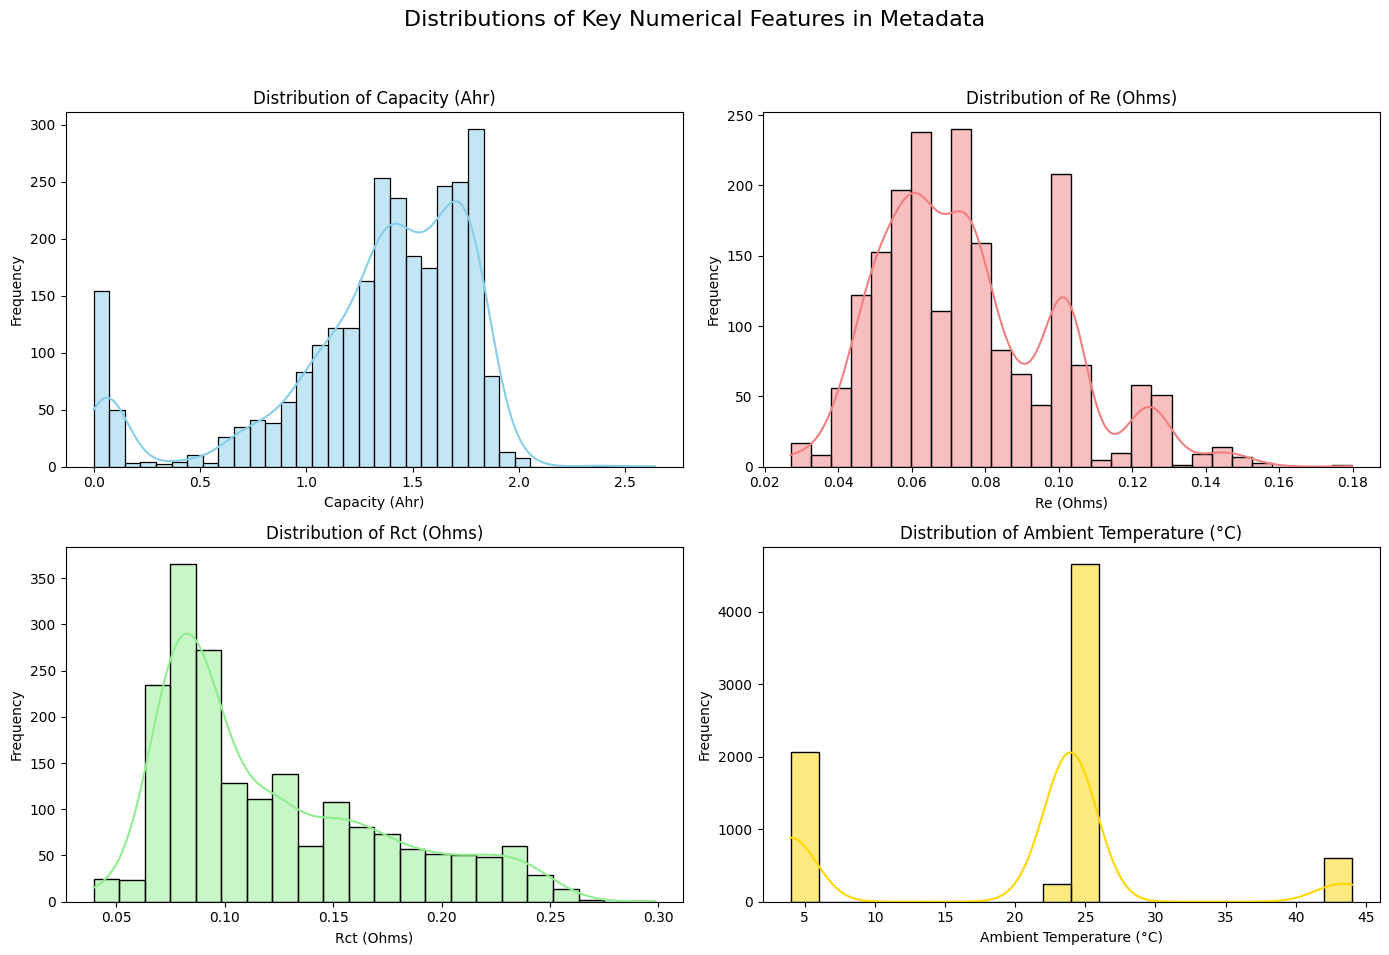


Visualizations generated. 


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'metadata' DataFrame is already loaded and cleaned from the previous steps

print("\n--- Visualizing Distributions of Key Numerical Features ---")

# Set up the matplotlib figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distributions of Key Numerical Features in Metadata', fontsize=16)

# Plot Capacity distribution
sns.histplot(metadata['Capacity'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Capacity (Ahr)')
axes[0, 0].set_xlabel('Capacity (Ahr)')
axes[0, 0].set_ylabel('Frequency')

# Plot Re distribution
sns.histplot(metadata['Re'].dropna(), kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Re (Ohms)')
axes[0, 1].set_xlabel('Re (Ohms)')
axes[0, 1].set_ylabel('Frequency')

# Plot Rct distribution
sns.histplot(metadata['Rct'].dropna(), kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Rct (Ohms)')
axes[1, 0].set_xlabel('Rct (Ohms)')
axes[1, 0].set_ylabel('Frequency')

# Plot Ambient Temperature distribution
sns.histplot(metadata['ambient_temperature'].dropna(), kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Ambient Temperature (°C)')
axes[1, 1].set_xlabel('Ambient Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\nVisualizations generated. ")



--- Performing Correlation Analysis ---

Correlation Matrix:
                     Capacity        Re       Rct  ambient_temperature
Capacity              1.00000       NaN       NaN             0.648890
Re                        NaN  1.000000  0.536072            -0.195024
Rct                       NaN  0.536072  1.000000            -0.220739
ambient_temperature   0.64889 -0.195024 -0.220739             1.000000


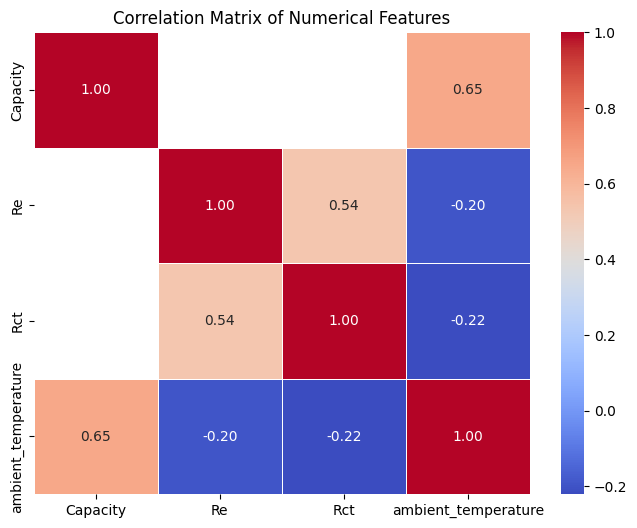


Correlation analysis completed and heatmap generated.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'metadata' DataFrame is already loaded and cleaned

print("\n--- Performing Correlation Analysis ---")

# Select only numerical columns for correlation analysis
numerical_features = ['Capacity', 'Re', 'Rct', 'ambient_temperature']
correlation_matrix = metadata[numerical_features].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nCorrelation analysis completed and heatmap generated.")


In [11]:
print(metadata['Capacity'].nunique())
print(metadata['Re'].nunique())
print(metadata['Rct'].nunique())

print(metadata['Capacity'].std())
print(metadata['Re'].std())
print(metadata['Rct'].std())


2751
1933
1933
0.4725166674696791
0.024161444888286133
0.05174937840741235


In [12]:
print(metadata['Capacity'].isnull().sum())
print(metadata['Re'].isnull().sum())
print(metadata['Rct'].isnull().sum())


4796
5632
5632


In [10]:
import pandas as pd
import numpy as np

# Assuming 'metadata' DataFrame is already loaded and cleaned

print("\n--- Detecting Outliers using IQR Method ---")

numerical_features = ['Capacity', 'Re', 'Rct', 'ambient_temperature']

for feature in numerical_features:
    Q1 = metadata[feature].quantile(0.25)
    Q3 = metadata[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = metadata[(metadata[feature] < lower_bound) | (metadata[feature] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nOutliers detected in '{feature}':")
        print(outliers[[feature]]) # Displaying only the feature column for brevity
        print(f"  - Lower Bound: {lower_bound:.2f}")
        print(f"  - Upper Bound: {upper_bound:.2f}")
        print(f"  - Number of outliers: {len(outliers)}")
    else:
        print(f"\nNo significant outliers detected in '{feature}' using IQR method.")

print("\nOutlier detection complete.")

# --- Discussion on Outlier Handling Strategies ---
print("\n--- Outlier Handling Strategies ---")
print("Once outliers are identified, you have several strategies to handle them, depending on the nature of your data and the goals of your analysis:")
print("1.  **Removal:** If outliers are due to data entry errors or are clearly anomalous and few in number, you might remove them. However, be cautious as removing data can lead to loss of valuable information.")
print("2.  **Capping (Winsorization):** Replace outliers with a specified percentile value (e.g., 5th or 95th percentile). This limits the extreme values without removing them entirely.")
print("3.  **Transformation:** Apply mathematical transformations (e.g., log, square root) to the data to reduce the skewness caused by outliers.")
print("4.  **Imputation:** If outliers are considered missing values, you could impute them using methods like mean, median, or more sophisticated techniques.")
print("5.  **Model-based Handling:** Some models are less sensitive to outliers (e.g., tree-based models), or you might use robust statistical methods.")
print("\nChoose the strategy that best fits your domain knowledge and the impact of outliers on your specific problem.")



--- Detecting Outliers using IQR Method ---

Outliers detected in 'Capacity':
      Capacity
50    0.000000
132   0.000000
164   0.000000
234   0.000000
348   0.000000
...        ...
4364  0.096191
4368  0.278085
4482  0.000000
6807  0.000000
7060  0.000000

[214 rows x 1 columns]
  - Lower Bound: 0.37
  - Upper Bound: 2.46
  - Number of outliers: 214

Outliers detected in 'Re':
            Re
2323  0.152724
2325  0.144280
2335  0.149178
2337  0.146487
2339  0.150127
2341  0.145529
2351  0.149403
2353  0.145010
2363  0.149948
2365  0.145847
2375  0.148124
2377  0.145621
2387  0.147563
2389  0.145284
2391  0.146445
2393  0.146183
2403  0.145585
2405  0.146794
2407  0.156167
2409  0.156443
2757  0.145629
4353  0.179841
4365  0.148646
  - Lower Bound: 0.01
  - Upper Bound: 0.14
  - Number of outliers: 23

Outliers detected in 'Rct':
           Rct
305   0.268867
3466  0.265487
4353  0.298464
  - Lower Bound: -0.03
  - Upper Bound: 0.26
  - Number of outliers: 3

No significant outliers d

In [13]:
print("Data overlap analysis:")
print(f"Total rows: {len(metadata)}")
print(f"Rows with Capacity: {metadata['Capacity'].notna().sum()}")
print(f"Rows with Re: {metadata['Re'].notna().sum()}")
print(f"Rows with Rct: {metadata['Rct'].notna().sum()}")

# Most importantly - check overlap
capacity_and_resistance = metadata[['Capacity', 'Re', 'Rct']].dropna()
print(f"Rows with ALL THREE measurements: {len(capacity_and_resistance)}")

if len(capacity_and_resistance) > 0:
    print("\nCorrelation for overlapping data:")
    print(capacity_and_resistance.corr())
else:
    print("NO overlapping data found!")

Data overlap analysis:
Total rows: 7565
Rows with Capacity: 2769
Rows with Re: 1933
Rows with Rct: 1933
Rows with ALL THREE measurements: 0
NO overlapping data found!


In [14]:
metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.674305,NaN,NaN
1,impedance,2010-07-21 16:53:45,24,B0047,1,2,00002.csv,NaN,0.056058,0.200970
2,charge,2010-07-21 17:25:40,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,2010-07-21 20:31:05,24,B0047,3,4,00004.csv,NaN,0.053192,0.164734
4,discharge,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.524366,NaN,NaN


In [16]:
metadata.head(10)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.674305,NaN,NaN
1,impedance,2010-07-21 16:53:45,24,B0047,1,2,00002.csv,NaN,0.056058,0.200970
2,charge,2010-07-21 17:25:40,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,2010-07-21 20:31:05,24,B0047,3,4,00004.csv,NaN,0.053192,0.164734
4,discharge,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.524366,NaN,NaN
5,charge,2010-07-21 22:38:43,4,B0047,5,6,00006.csv,NaN,NaN,NaN
6,discharge,2010-07-22 01:40:06,4,B0047,6,7,00007.csv,1.508076,NaN,NaN
7,charge,2010-07-22 03:14:53,4,B0047,7,8,00008.csv,NaN,NaN,NaN
8,discharge,2010-07-22 06:16:21,4,B0047,8,9,00009.csv,1.483558,NaN,NaN
9,charge,2010-07-22 07:50:21,4,B0047,9,10,00010.csv,NaN,NaN,NaN


In [20]:
metadata['battery_id'].nunique()

34

In [22]:
grouped = metadata.groupby('battery_id')['filename'].apply(list)
print("Files for each battery:")
print(grouped)

Files for each battery:
battery_id
B0005    [05121.csv, 05122.csv, 05123.csv, 05124.csv, 0...
B0006    [04505.csv, 04506.csv, 04507.csv, 04508.csv, 0...
B0007    [05737.csv, 05738.csv, 05739.csv, 05740.csv, 0...
B0018    [06353.csv, 06354.csv, 06355.csv, 06356.csv, 0...
B0025    [04000.csv, 04001.csv, 04002.csv, 04003.csv, 0...
B0026    [04080.csv, 04081.csv, 04082.csv, 04083.csv, 0...
B0027    [03159.csv, 03160.csv, 03161.csv, 03162.csv, 0...
B0028    [01450.csv, 01451.csv, 01452.csv, 01453.csv, 0...
B0029    [01353.csv, 01354.csv, 01355.csv, 01356.csv, 0...
B0030    [02899.csv, 02900.csv, 02901.csv, 02902.csv, 0...
B0031    [04160.csv, 04161.csv, 04162.csv, 04163.csv, 0...
B0032    [01012.csv, 01013.csv, 01014.csv, 01015.csv, 0...
B0033    [02413.csv, 02414.csv, 02415.csv, 02416.csv, 0...
B0034    [01805.csv, 01806.csv, 01807.csv, 01808.csv, 0...
B0036    [03514.csv, 03515.csv, 03516.csv, 03517.csv, 0...
B0038    [02291.csv, 02292.csv, 02293.csv, 02294.csv, 0...
B0039    [01109.csv, 

In [24]:
# Get count of files per battery
files_per_battery = metadata.groupby('battery_id')['filename'].count()
print("Number of files per battery:")
print(files_per_battery)

# Get detailed info for each battery
print("\nDetailed breakdown:")
for battery_id in metadata['battery_id'].unique():
    battery_files = metadata[metadata['battery_id'] == battery_id]['filename'].tolist()
    print(f"\nBattery {battery_id} ({len(battery_files)} files):")
    for i, file_name in enumerate(battery_files, 1):
        print(f"  {i}. {file_name}")

Number of files per battery:
battery_id
B0005    616
B0006    616
B0007    616
B0018    319
B0025     80
B0026     80
B0027     80
B0028     80
B0029     97
B0030     97
B0031     97
B0032     97
B0033    486
B0034    486
B0036    486
B0038    122
B0039    122
B0040    122
B0041    163
B0042    275
B0043    275
B0044    275
B0045    184
B0046    184
B0047    184
B0048    184
B0049     62
B0050     62
B0051     62
B0052     62
B0053    137
B0054    253
B0055    252
B0056    252
Name: filename, dtype: int64

Detailed breakdown:

Battery B0047 (184 files):
  1. 00001.csv
  2. 00002.csv
  3. 00003.csv
  4. 00004.csv
  5. 00005.csv
  6. 00006.csv
  7. 00007.csv
  8. 00008.csv
  9. 00009.csv
  10. 00010.csv
  11. 00011.csv
  12. 00012.csv
  13. 00013.csv
  14. 00014.csv
  15. 00015.csv
  16. 00016.csv
  17. 00017.csv
  18. 00018.csv
  19. 00019.csv
  20. 00020.csv
  21. 00021.csv
  22. 00022.csv
  23. 00023.csv
  24. 00024.csv
  25. 00025.csv
  26. 00026.csv
  27. 00027.csv
  28. 00028.csv
 

In [10]:
discharge_metadata_df = metadata[metadata['type'] == 'discharge'].copy()
print("\nDischarge metadata head:")
print(discharge_metadata_df.head())
print(f"\nNumber of discharge entries: {len(discharge_metadata_df)}")


Discharge metadata head:
         type          start_time  ambient_temperature battery_id  test_id  \
0   discharge 2010-07-21 15:00:35                    4      B0047        0   
4   discharge 2010-07-21 21:02:56                    4      B0047        4   
6   discharge 2010-07-22 01:40:06                    4      B0047        6   
8   discharge 2010-07-22 06:16:21                    4      B0047        8   
10  discharge 2010-07-22 10:51:48                    4      B0047       10   

    uid   filename  Capacity  Re  Rct  
0     1  00001.csv  1.674305 NaN  NaN  
4     5  00005.csv  1.524366 NaN  NaN  
6     7  00007.csv  1.508076 NaN  NaN  
8     9  00009.csv  1.483558 NaN  NaN  
10   11  00011.csv  1.467139 NaN  NaN  

Number of discharge entries: 2794


In [12]:
discharge_metadata_df['Capacity'] = pd.to_numeric(discharge_metadata_df['Capacity'], errors='coerce')
discharge_metadata_df.dropna(subset=['Capacity'], inplace=True)
print(f"\nNumber of discharge entries after NaN removal for Capacity: {len(discharge_metadata_df)}")


Number of discharge entries after NaN removal for Capacity: 2769


In [14]:
import os

nasa_data_root = '/Users/siddhantaggarwal/Desktop/Battery_RUL/cleaned_dataset/data' # E.g., 'C:/Users/YourUser/Downloads/NASA_Battery_Data/'

# Function to construct the full path
def get_full_path(row):
    # Assuming folder structure is nasa_data_root/BXXXX/individual_csv_files.csv
    battery_folder = row['battery_id'] # e.g., 'B0047'
    file_name = row['filename']       # e.g., '0100001.csv'
    return os.path.join(nasa_data_root, battery_folder, file_name)

discharge_metadata_df['full_path'] = discharge_metadata_df.apply(get_full_path, axis=1)
print("\nMetadata with full paths:")
print(discharge_metadata_df.head())


Metadata with full paths:
         type          start_time  ambient_temperature battery_id  test_id  \
0   discharge 2010-07-21 15:00:35                    4      B0047        0   
4   discharge 2010-07-21 21:02:56                    4      B0047        4   
6   discharge 2010-07-22 01:40:06                    4      B0047        6   
8   discharge 2010-07-22 06:16:21                    4      B0047        8   
10  discharge 2010-07-22 10:51:48                    4      B0047       10   

    uid   filename  Capacity  Re  Rct  \
0     1  00001.csv  1.674305 NaN  NaN   
4     5  00005.csv  1.524366 NaN  NaN   
6     7  00007.csv  1.508076 NaN  NaN   
8     9  00009.csv  1.483558 NaN  NaN   
10   11  00011.csv  1.467139 NaN  NaN   

                                            full_path  
0   /Users/siddhantaggarwal/Desktop/Battery_RUL/cl...  
4   /Users/siddhantaggarwal/Desktop/Battery_RUL/cl...  
6   /Users/siddhantaggarwal/Desktop/Battery_RUL/cl...  
8   /Users/siddhantaggarwal/Deskt